<a href="https://colab.research.google.com/github/Serarrs/dap-2024/blob/main/les06/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
<br>
**«БЕЛГОРОДСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ
ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ»
<br>
(НИУ «БелГУ»)**
<br><br>
ИНСТИТУТ ИНЖЕНЕРНЫХ И ЦИФРОВЫХ ТЕХНОЛОГИЙ
<br><br>
**Кафедра информационных и робототехнических систем**
<br><br><br><br>
**ОТЧЕТ**
<br>
по лабораторной работе №6
<br>
на тему: «Линейная регрессия»
<br>
по дисциплине
<br>
«Анализ данных на Python»
<br>
студента очной формы обучения
<br>
направления подготовки
<br><br><br>
09.03.02 – Информационные системы и технологии
<br>
3 курса группы 12002208
<br>
Кузьмина Анатолия Витальевича

<br><br><br><br><div>
<div align="right">

Проверил:
<br>
ДВОПУ
<br>
Чеботарев С. А.
<div><br><br><br>
<div align="center">

Белгород 2025
<div>
___________

<div align="center">

<br>Ход работы<br>

Задача №1. Выведете описание набора данных и наименование признаков.

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

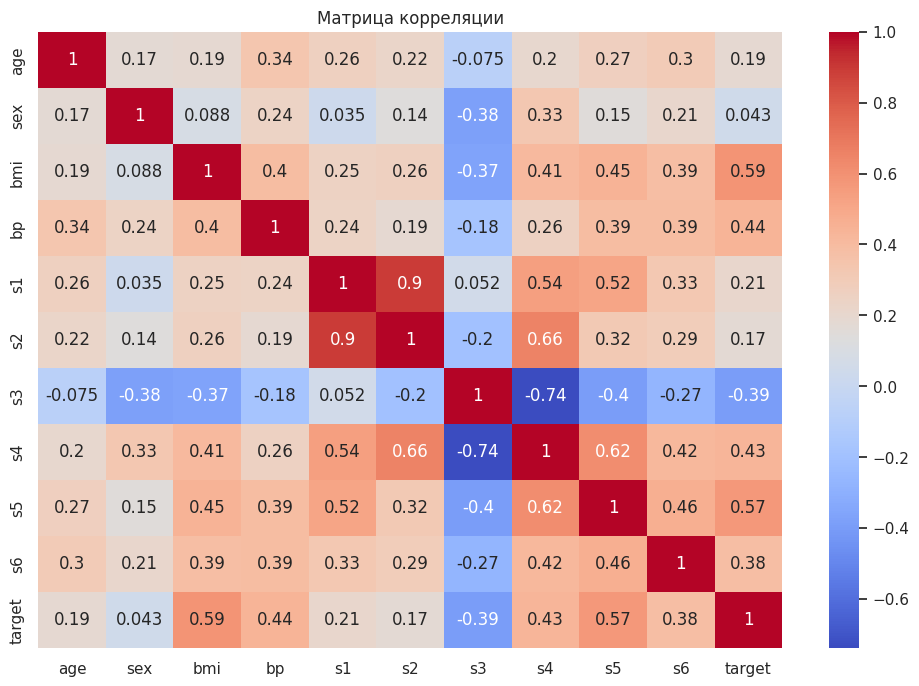


Признак с наибольшей корреляцией: bmi (коэф. корреляции = 0.59)


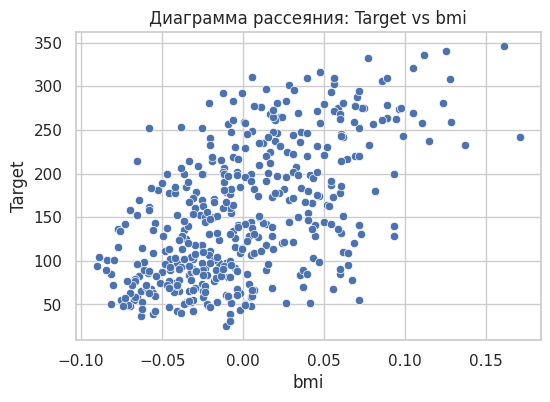


Топ-5 признаков: ['bmi', 's5', 'bp', 's4', 's3']

RMSE: 53.78
R²: 0.48


In [70]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Задача №1. Выведете описание набора данных и наименование признаков
diabetes = datasets.load_diabetes()
print("Описание набора данных:")
print(diabetes['DESCR'])
print("\nНазвания признаков:")
print(diabetes['feature_names'])

# Задача №2. Создайте DataFrame с признаками и целевым значением, выведите первые 5 строк
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("\nПервые 5 строк DataFrame:")
print(df.head())

# Задача №3. Выведите информацию о типах данных, категориальных признаках и null-значениях
print("\nИнформация о типах данных:")
print(df.info())
print("\nНаличие пропусков:")
print(df.isnull().sum())

# Задача №4. Постройте матрицу корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")
plt.show()

# Задача №5. Диаграмма рассеяния для признака с наибольшей корреляцией с целевым значением
correlations = df.corr()['target'].drop('target')
max_corr_feature = correlations.abs().idxmax()
print(f"\nПризнак с наибольшей корреляцией: {max_corr_feature} (коэф. корреляции = {correlations[max_corr_feature]:.2f})")

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df[max_corr_feature], y=df['target'])
plt.xlabel(max_corr_feature)
plt.ylabel("Target")
plt.title(f"Диаграмма рассеяния: Target vs {max_corr_feature}")
plt.show()

# Задача №6. Сформируйте X из 5 признаков с самой высокой корреляцией с target, сформируйте y
top_5_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()
X = df[top_5_features]
y = df['target']
print(f"\nТоп-5 признаков: {top_5_features}")

# Задача №7. Разделите данные на обучающую и тестовую выборки (25% — тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Задача №8. Обучите модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Задача №9. Расчет RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE: {rmse:.2f}")

# Задача №10. Расчет R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")